# RosBag python class to process bag files 

- Python 3.6 environment
- This notebook runs on a ROS kinetic environment
- Notebook with ros runs via: pip install jupyros
- rosbag was installed using pip3

In [1]:
# TODO: discuss reading large files & printing information
# TODO: plot a pie chart of topics
# TODO: plot a pie chart of messages of a topic
# TODO: Discuss with divin if bag_info and bag_content are both necessary
# TODO: convert to csv 

# TODO: add script for RosBag visualization (receives pd dataframe and generates multiple plots)

## Import libraries

In [2]:
# jupyter kernel
import sys
print(sys.version)

3.6.9 (default, Jul  3 2019, 15:36:16) 
[GCC 5.4.0 20160609]


In [3]:
import rosbag
import time
import glob
import rospy
import pandas as pd
# import rosbag_pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [4]:
class RosBag():
    """
    RosBag object containing methods to:
    Read, pre-process and plot data given a ROS bag file
    
    Input: bag_name
        string: name of bag file in directory
    """
    
    def __init__(self, bag_name):
        """
        Initialize attributes of bag file
        """
        self.bag = rosbag.Bag(bag_name)
        self.Start_Time = self.convert_time(self.bag.get_start_time())
        self.End_Time = self.convert_time(self.bag.get_end_time())
        self.Messages = self.bag.get_type_and_topic_info()[0].keys()
        self.Topics = self.bag.get_type_and_topic_info()[1].keys()
        self.msgs = [self.bag.get_type_and_topic_info()[1].get(i) for i in self.bag.get_type_and_topic_info()[1].keys()]
    
    def convert_time(self, tm):
        return time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime(tm))
    
    def read_message(msg):
        headers = msg.__slots__
        for i in headers:
            print(i + ' : ' + str(getattr(msg, i)))
        
    def bag_metadata(self):
        print('--------------------------------------------------------------------')
        print("RosBag meta data:")
        print(self.bag)

    # def bag_info(self):
        # Start_Time = self.convert_time(self.bag.get_start_time())
        # End_Time = self.convert_time(self.bag.get_end_time())
        # Messages = self.bag.get_type_and_topic_info()[0].keys()
        # self.Topics = self.bag.get_type_and_topic_info()[1].keys()
        # self.msgs = [self.bag.get_type_and_topic_info()[1].get(i) for i in self.bag.get_type_and_topic_info()[1].keys()]
        
        # TODO: printing this much is not convenient for long files
        # print('Start Time : ' + str(Start_Time))
        # print('End Time : ' + str(End_Time))
        # print('Topics : ' + str(self.Topics))
        # print('Messages : ' + str(Messages))
        
        # print('--------------------------------------------------------------------')
        # print('Topics and Messages :')
        # for idx, j in enumerate(self.Topics):
            # print('\n')
            # print('Topic : ' + str(j))
            # print('Message : ' + str(self.msgs[idx].msg_type))
            # print('Count : ' + str(self.msgs[idx].message_count))
            # print('Connections : ' + str(self.msgs[idx].connections))
            # print('Frequency : ' + str(round(self.msgs[idx].frequency, 1)) + ' Hz')
            
        # self.bag.close()
    
    def bag_to_pandas(self):
        
        # Create Pandas dataframe
        self.df1 = pd.DataFrame(columns = ['Topic', 'Message', 'Count', 'Connections', 'Frequency'])
        
        for idx, j in enumerate(self.Topics):
            self.df1 = self.df1.append({'Topic' : j, 'Message' : self.msgs[idx].msg_type, 
                          'Count' : self.msgs[idx].message_count, 'Connections' : self.msgs[idx].connections, 
                          'Frequency' : self.msgs[idx].frequency}, ignore_index=True)

        # self.df1 = self.df1.set_index('Topic')
        
        return self.df1
    
    def bag_to_csv(self):
        # NOTE: This method relies on bag_to_pandas (work this out)
        return self.df1.to_csv('Rosbag_Info.csv', index=True)

## Read bagfiles in folder


In [5]:
bag_names = glob.glob("bagfiles/*.bag")
print(bag_names[0])

bagfiles/turtle_simulation.bag


## Instantiate ros_bag object

In [6]:
ros_bag_turtle_sim = RosBag(bag_names[0])
ros_bag_turtle_sim.bag_metadata()

--------------------------------------------------------------------
RosBag meta data:
path:        bagfiles/turtle_simulation.bag
version:     2.0
duration:    2:23s (143s)
start:       Oct 24 2019 13:52:05.93 (1571917925.93)
end:         Oct 24 2019 13:54:29.80 (1571918069.80)
size:        1.2 MB
messages:    18039
compression: none [2/2 chunks]
types:       geometry_msgs/Twist [9f195f881246fdfa2798d1d3eebca84a]
             rosgraph_msgs/Log   [acffd30cd6b6de30f120938c17c593fb]
             turtlesim/Color     [353891e354491c51aabe32df673fb446]
             turtlesim/Pose      [863b248d5016ca62ea2e895ae5265cf9]
topics:      /rosout                    4 msgs @ 54.5 kHz : rosgraph_msgs/Log   (2 connections)
             /turtle1/cmd_vel          76 msgs @   4.0 Hz : geometry_msgs/Twist
             /turtle1/color_sensor   8979 msgs @  62.8 Hz : turtlesim/Color    
             /turtle1/pose           8980 msgs @  62.8 Hz : turtlesim/Pose


## Convert bag to pandas

In [7]:
df_turtlesim = ros_bag_turtle_sim.bag_to_pandas()
df_turtlesim.head(10)

,Topic,Message,Count,Connections,Frequency
0,/rosout,rosgraph_msgs/Log,4,2,54471.480519
1,/turtle1/cmd_vel,geometry_msgs/Twist,76,1,3.958306
2,/turtle1/color_sensor,turtlesim/Color,8979,1,62.804495
3,/turtle1/pose,turtlesim/Pose,8980,1,62.803085


## Pandas visualization

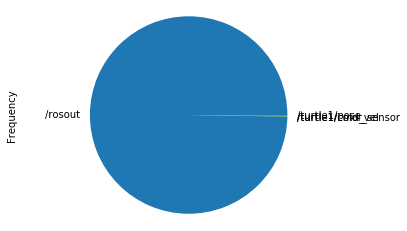

In [8]:
# Topics frequencies
df_turtlesim.Frequency.groupby(df_turtlesim.Topic).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

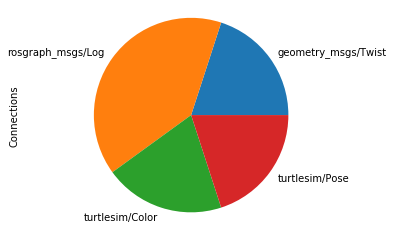

In [9]:
# Connections per message
df_turtlesim.Connections.groupby(df_turtlesim.Message).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

In [10]:
# control flow data visualization
# give df to java side (backend to frontend)
# filter bag based on string topics (not rest of topics)
# next week: multiple ways of communication
# if questions: raise issue and tag santosh
# how to connect d3.js with python
# debul: test cases in developments (unit test python framework)